In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
List_url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
source = requests.get(List_url).text

In [3]:
soup = BeautifulSoup(source, 'xml')

In [4]:
table=soup.find('table')

In [5]:
column_names = ['Postalcode','Borough','Neighborhood']
df = pd.DataFrame(columns = column_names)

In [6]:
for tr_cell in table.find_all('tr'):
    row_data=[]
    for td_cell in tr_cell.find_all('td'):
        row_data.append(td_cell.text.strip())
    if len(row_data)==3:
        df.loc[len(df)] = row_data

In [7]:
df.head()

,Postalcode,Borough,Neighborhood
0,M1A,Not assigned,
1,M2A,Not assigned,
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront


# PART 1

In [12]:
df=df[df['Borough']!='Not assigned']

In [14]:
df=df[df['Neighborhood']!='']

In [15]:
df.head()

,Postalcode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront
5,M6A,North York,Lawrence Manor / Lawrence Heights
6,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government


In [16]:
temp_df=df.groupby('Postalcode')['Neighborhood'].apply(lambda x: "%s" % ', '.join(x))
temp_df=temp_df.reset_index(drop=False)
temp_df.rename(columns={'Neighborhood':'Neighborhood_joined'},inplace=True)

In [17]:
df_merge = pd.merge(df, temp_df, on='Postalcode')

In [18]:
df_merge.drop(['Neighborhood'],axis=1,inplace=True)

In [19]:
df_merge.drop_duplicates(inplace=True)

In [20]:
df_merge.rename(columns={'Neighborhood_joined':'Neighborhood'},inplace=True)

In [23]:
df_merge.head(12)

,Postalcode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Regent Park / Harbourfront
3,M6A,North York,Lawrence Manor / Lawrence Heights
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,Malvern / Rouge
7,M3B,North York,Don Mills
8,M4B,East York,Parkview Hill / Woodbine Gardens
9,M5B,Downtown Toronto,Garden District / Ryerson


In [25]:
df_merge.shape

(103, 3)

# PART 2

In [100]:
url="http://cocl.us/Geospatial_data"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))

c.columns = ['Postalcode', 'Latitude', 'Longitude']
df_abc = pd.merge(c, df_merge, on='Postalcode')

df_abc = df_abc[['Postalcode', 'Borough', 'Neighborhood', 'Latitude', 'Longitude']]
df_abc.head(20)


,Postalcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,Malvern / Rouge,43.806686,-79.194353
1,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek,43.784535,-79.160497
2,M1E,Scarborough,Guildwood / Morningside / West Hill,43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,Kennedy Park / Ionview / East Birchmount Park,43.727929,-79.262029
7,M1L,Scarborough,Golden Mile / Clairlea / Oakridge,43.711112,-79.284577
8,M1M,Scarborough,Cliffside / Cliffcrest / Scarborough Village West,43.716316,-79.239476
9,M1N,Scarborough,Birch Cliff / Cliffside West,43.692657,-79.264848


# PART 3

/opt/conda/envs/Python36/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


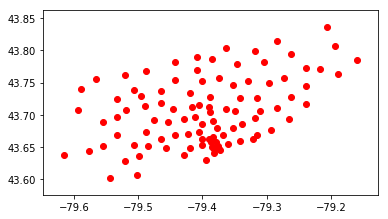

In [99]:

%matplotlib inline
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt
df_abc['Coordinates'] = list(zip(df_abc.Longitude, df_abc.Latitude))
df_abc['Coordinates'] = df_abc['Coordinates'].apply(Point)
gdf = gpd.GeoDataFrame(df_abc, geometry='Coordinates')

cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
ax = cities[cities.name == "Toronto"].plot(
    color='white', edgecolor='black')

gdf.plot(ax=ax, color='red')
plt.show()